In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("tf-idf_label.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("tanggal", axis=1)
df.head()

,label,abai,adam,agenda,ajar,akibat,aksi,aktivis,alami,alas,...,versi,vi,viral,wacana,wagub,wajib,wakil,wali,warga,wasilah
0,Megapolitan,0.0,0.0,0.0,0.34739,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nasional,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Megapolitan,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nasional,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nasional,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = df.iloc[:, 1:320].values
y = df.iloc[:, 0].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state=5)

In [5]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB = NB.fit(X_train, y_train)

In [6]:
# akurasi
from sklearn.metrics import accuracy_score

y_pred = NB.predict(X_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def klasifikasi(X, y, tes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = tes, random_state=5)
    NB = MultinomialNB()
    NB = NB.fit(X_train, y_train)
    # akurasi
    y_pred = NB.predict(X_test)
    akurasi = accuracy_score(y_test, y_pred)

    return(tes,akurasi)


In [8]:
list_testSize= []
list_akurasi= []

a,b = klasifikasi(X,y, 0.65)
list_testSize.append(a)
list_akurasi.append(b)
a,b = klasifikasi(X,y, 0.70)
list_testSize.append(a)
list_akurasi.append(b)
a,b = klasifikasi(X,y, 0.75)
list_testSize.append(a)
list_akurasi.append(b)
a,b = klasifikasi(X,y, 0.8)
list_testSize.append(a)
list_akurasi.append(b)

print(list_testSize)
print(list_akurasi)


[0.65, 0.7, 0.75, 0.8]
[0.8095238095238095, 0.8888888888888888, 0.9333333333333333, 0.9166666666666666]


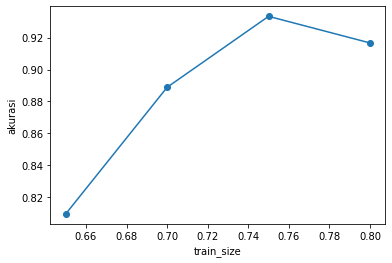

In [9]:
import matplotlib.pyplot as plt

plt.scatter(list_testSize,list_akurasi)
plt.plot(list_testSize,list_akurasi)
plt.ylabel('akurasi')
plt.xlabel('train_size')

plt.show()